<a href="https://colab.research.google.com/github/rafatob/apuntes-python/blob/master/PythonDatacamp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
help(pd.DataFrame)

Manually create a Dataframe

In [2]:
import pandas as pd
import numpy as np

In [ ]:
df=pd.DataFrame({
    'A':[1,2,3],
    'B': [4,5,6],
    'C':[7,8,9]},index=['x', 'y', 'z']
)

In [ ]:
print(df)

   A  B  C
x  1  4  7
y  2  5  8
z  3  6  9


Subsetting columns: 2 posibilities

In [ ]:
df.A

x    1
y    2
z    3
Name: A, dtype: int64

In [ ]:
df['A']

x    1
y    2
z    3
Name: A, dtype: int64

In [ ]:
df[['A','B']]

,A,B
x,1,4
y,2,5
z,3,6


SUBSETING ROWS >> iloc : mediante su índice

In [ ]:
df.iloc[0]

A    1
B    4
C    7
Name: x, dtype: int64

In [ ]:
df.iloc[[0,1]]

,A,B,C
x,1,4,7
y,2,5,8


In [ ]:
df.iloc[0,1]

4

También podemos obtener una columna mediante su nombre >>> .loc

In [ ]:
df.loc['x']

A    1
B    4
C    7
Name: x, dtype: int64

In [ ]:
df.loc[['x','z']]

,A,B,C
x,1,4,7
z,3,6,9


Multiple rows and columns

In [ ]:
df.loc['z','A']

3

In [ ]:
df.loc[['x','y'],['A','C']]

,A,C
x,1,7
y,2,8


Conditional subsetting

In [ ]:
df[df.A==1]

,A,B,C
x,1,4,7


In [ ]:
df[(df.A==1)|(df.C==8)]

,A,B,C
x,1,4,7
y,2,5,8


Los atributos en Pandas se piden sin los parentesis

In [ ]:
df.shape

(3, 3)

In [ ]:
# Subset rows and columns
print(tips.loc[tips['sex'] == 'Female', ['total_bill', 'tip', 'sex']])

# 3 rows and 3 columns with iloc
print(tips.iloc[0:3, 0:3])

Datatypes

en R utilizamos str(df), en Python df.info()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3 entries, x to z
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   A       3 non-null      int64
 1   B       3 non-null      int64
 2   C       3 non-null      int64
dtypes: int64(3)
memory usage: 176.0+ bytes


# Convert datatypes
Ejemplo: convertir integer to string

In [ ]:
df['A']=df['A'].astype(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3 entries, x to z
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   A       3 non-null      object
 1   B       3 non-null      int64 
 2   C       3 non-null      int64 
dtypes: int64(2), object(1)
memory usage: 176.0+ bytes


# String Accessor
permite hacer operaciones en el string

In [ ]:
df=pd.DataFrame({'name':['Daniel  ','  Eric','  Julia  ']})
df

,name
0,Daniel
1,Eric
2,Julia


In [ ]:
df['name_strip']=df['name'].str.strip()
df

,name,name_strip
0,Daniel,Daniel
1,Eric,Eric
2,Julia,Julia


# Creando Factores (categorias) en Pandas

In [ ]:
df=pd.DataFrame({'name':['Daniel  ','  Eric','  Julia  '],
                 'gender': ['Male','Male','Female']})
df.dtypes

name      object
gender    object
dtype: object

In [ ]:
df['gender_cat']=df['gender'].astype('category')
df.dtypes

name            object
gender          object
gender_cat    category
dtype: object

In [ ]:
df['gender_cat'].cat.categories

Index(['Female', 'Male'], dtype='object')

In [ ]:
df['gender_cat'].cat.codes

0    1
1    1
2    0
dtype: int8

#Datetime

In [ ]:
df=pd.DataFrame({'name':['pedro','juan','diego'],
                 'born':['1978-09-15','1983-05-23','1966-02-20']})

df['born_dt']=pd.to_datetime(df.born)
df.dtypes

name               object
born               object
born_dt    datetime64[ns]
dtype: object

#Datetime accessors

In [ ]:
df['born_dt'].dt.day
df['born_dt'].dt.month
df['born_dt'].dt.year

0    1978
1    1983
2    1966
Name: born_dt, dtype: int64

# NaN: en Python, al contrario que en R, los valores NA son dejados de lado por defecto(en R se usa na.omit=T)

# Funciones Apply: 
## R >> apply(df,2,mean) Promedio x columna

## Python >> df.apply(np.mean,axis=0)
axis=0 column wise

axis=1 row wise

In [ ]:
df=pd.DataFrame({'A':[1,2,3],
                 'B':[4,5,6]})

In [ ]:
df.apply(np.mean,axis=0)

A    2.0
B    5.0
dtype: float64

In [ ]:
df.apply(np.mean,axis=1)

0    2.5
1    3.5
2    4.5
dtype: float64

# Tidy Data en Python

¿cómo ordenamos de forma que podamos trabajar sin problemas?

In [ ]:
df=pd.DataFrame({'name':['John Smith','Jane Doe','Mary Johnson'],
    'treatment_a':[np.nan,16.0,3.0],
    'treatment_b':[2,11,1]})

In [ ]:
print(df)

           name  treatment_a  treatment_b
0    John Smith          NaN            2
1      Jane Doe         16.0           11
2  Mary Johnson          3.0            1


# Cómo ordenamos esto para que podamos utilizarlo como un dataframe con todas las de la ley?

la función pd.melt nos ayuda, en este caso id_vars nos indica la columna que deseamos mantener como identificador

In [ ]:
df_melt=pd.melt(df,id_vars='name')
df_melt

,name,variable,value
0,John Smith,treatment_a,NaN
1,Jane Doe,treatment_a,16.0
2,Mary Johnson,treatment_a,3.0
3,John Smith,treatment_b,2.0
4,Jane Doe,treatment_b,11.0
5,Mary Johnson,treatment_b,1.0


# Hay ocasiones en que queremos volver atrás y dejar la data como una tabla pivote

## Tidy Pivot_table

In [ ]:
df_melt_pivot = pd.pivot_table(df_melt,
                             index='name',
                             columns='variable',
                             values='value')

In [ ]:
df_melt_pivot

variable,treatment_a,treatment_b
name,,
Jane Doe,16.0,11.0
John Smith,NaN,2.0
Mary Johnson,3.0,1.0


In [ ]:
df_melt_pivot.reset_index()

variable,name,treatment_a,treatment_b
0,Jane Doe,16.0,11.0
1,John Smith,NaN,2.0
2,Mary Johnson,3.0,1.0


# Groupby

groupby: split-apply-combine

split data into separate partitions

apply a function on each partition

combine the results

In [ ]:
df_melt

,name,variable,value
0,John Smith,treatment_a,NaN
1,Jane Doe,treatment_a,16.0
2,Mary Johnson,treatment_a,3.0
3,John Smith,treatment_b,2.0
4,Jane Doe,treatment_b,11.0
5,Mary Johnson,treatment_b,1.0


In [ ]:
df_melt.groupby('name')['value'].mean()

name
Jane Doe        13.5
John Smith       2.0
Mary Johnson     2.0
Name: value, dtype: float64

## Función para ver si un dataset tiene valores nulos
la función se opera por fuera

pd.isnull(df['column'])

In [ ]:
pd.isnull(df_melt)

,name,variable,value
0,False,False,True
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
5,False,False,False


## Existe un método para rellenar valores NA

In [ ]:
# Print the rows where total_bill is missing
print(df_melt.loc[pd.isnull(df_melt['value'])])

         name     variable  value
0  John Smith  treatment_a    NaN


In [ ]:
# Mean of the total_bill column
value_mean = df_melt['value'].mean()
print(value_mean)

6.6


In [ ]:
# Fill in missing total_bill
print(df_melt['value'].fillna(value_mean))

0     6.6
1    16.0
2     3.0
3     2.0
4    11.0
5     1.0
Name: value, dtype: float64


# También se puede utilizar el método .dropna()

In [ ]:

df_melt

,name,variable,value
0,John Smith,treatment_a,NaN
1,Jane Doe,treatment_a,16.0
2,Mary Johnson,treatment_a,3.0
3,John Smith,treatment_b,2.0
4,Jane Doe,treatment_b,11.0
5,Mary Johnson,treatment_b,1.0


In [ ]:
df_melt.dropna()

,name,variable,value
1,Jane Doe,treatment_a,16.0
2,Mary Johnson,treatment_a,3.0
3,John Smith,treatment_b,2.0
4,Jane Doe,treatment_b,11.0
5,Mary Johnson,treatment_b,1.0


In [ ]:
df_melt

,name,variable,value
0,John Smith,treatment_a,NaN
1,Jane Doe,treatment_a,16.0
2,Mary Johnson,treatment_a,3.0
3,John Smith,treatment_b,2.0
4,Jane Doe,treatment_b,11.0
5,Mary Johnson,treatment_b,1.0


# Ploting in Python

Pandas: utiliza el método .plot()

Seaborn

Matplotlib

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris

In [ ]:
iris=load_iris()

In [ ]:
type(iris)
data = pd.DataFrame(iris.data)
data.columns = iris.feature_names
data['label'] = iris.target

In [ ]:
data.dtypes

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
label                  int64
dtype: object

# Graficos para data Univariada
## Histogramas

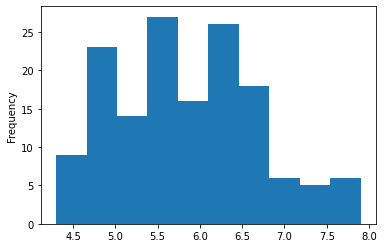

In [ ]:
data['sepal length (cm)'].plot(kind='hist')
plt.show()

## Bar Plot
Primero debemos calcular la frecuencia de cada categoria

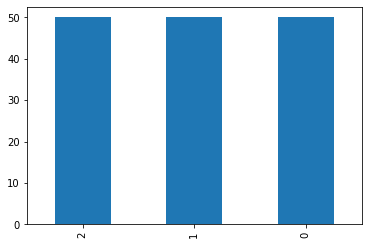

In [ ]:
cts = data['label'].value_counts()
cts.plot(kind='bar')
plt.show()

# Data Bivariada
## Scatter

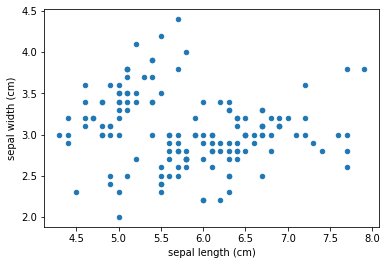

In [ ]:
data.plot(kind='scatter',x='sepal length (cm)',y='sepal width (cm)')
plt.show()

## Boxplot

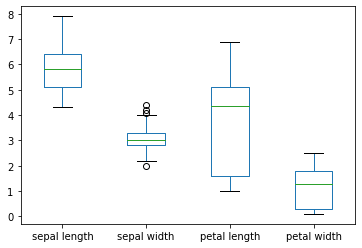

In [ ]:
data.columns = ['sepal length', 'sepal width','petal length','petal width','species']

data[['sepal length','sepal width','petal length','petal width']].plot(kind='box')
plt.show()

In [ ]:
type(data)

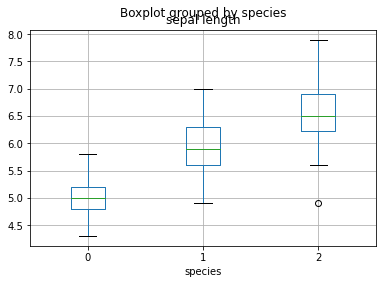

In [ ]:
data.boxplot(by='species',column='sepal length')
plt.show()

# Seaborn
## Histogram

In [ ]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


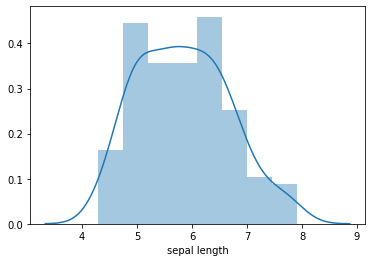

In [ ]:
sns.distplot(data['sepal length'])
plt.show()

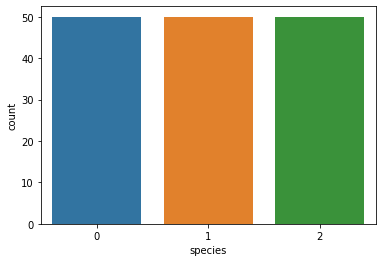

In [ ]:
sns.countplot('species',data=data)
plt.show()

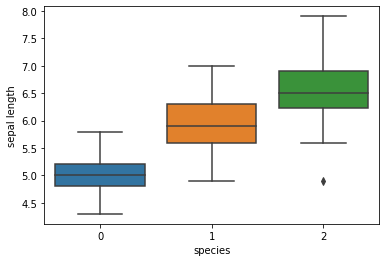

In [ ]:
sns.boxplot(x='species',y='sepal length',data=data)
plt.show()

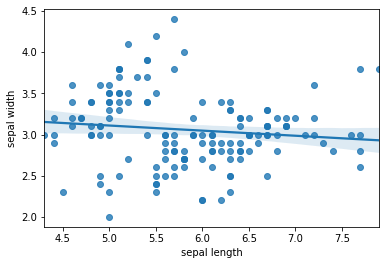

In [ ]:
sns.regplot(y='sepal width',x='sepal length',data=data)
plt.show()

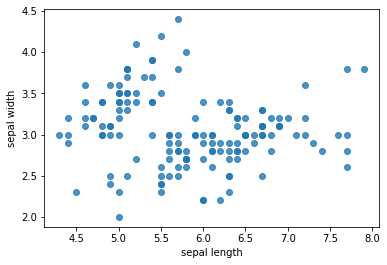

In [ ]:
sns.regplot(y='sepal width',x='sepal length',data=data,fit_reg=False)
plt.show()

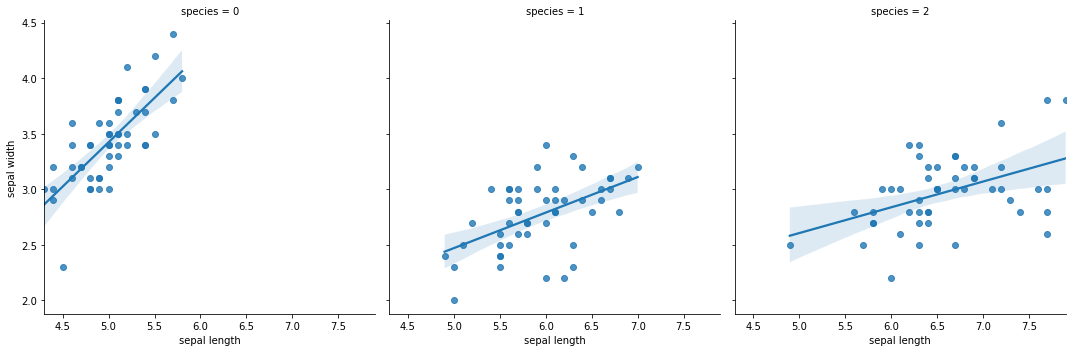

In [ ]:
sns.lmplot(y='sepal width',x='sepal length',data=data,col='species')
plt.show()

# Seaborn Facet Grid

##Permite crear previamente separaciones de la data que luego pueden ser ploteadas

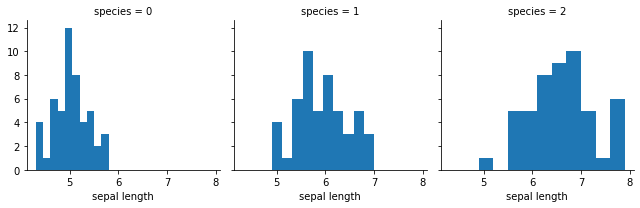

In [ ]:
g=sns.FacetGrid(data,col='species')
g=g.map(plt.hist,'sepal length')
plt.show()

# Matplotlib
#Este tipo de graficas funciona con dos objetos, Figure (fig)y Axes(ax)[pueden ser varios ax] dentro de la misma Figure 

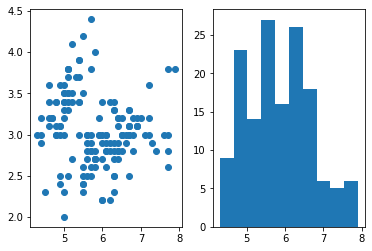

In [ ]:
fig,(ax1,ax2) = plt.subplots(1,2)
ax1.scatter(data['sepal length'],data['sepal width'])
ax2.hist(data['sepal length'])
plt.show()

#Load multiple data files
It's perfectly fine to manually import multiple datasets. However, there will be times when you'd want to import a bunch of datasets without having to make multiple read_csv() calls. You can use the glob library that is built into Python to look for files that match a pattern. The library is called "glob" because "globbing" is the way patterns are specified in the Bash shell.

The glob() function returns a list of filenames that match a specified pattern. You can then use a list comprehension to import multiple files into a list, and then you can extract the DataFrame of interest.

In [ ]:
import glob
import pandas as pd

In [ ]:
# Get a list of all the csv files
csv_files = glob.glob('*.csv')

# List comprehension that loads of all the files
dfs = [pd.read_csv(x) for x in csv_files]

# List comprehension that looks at the shape of all DataFrames
print([x.shape for x in dfs])

[]


In [ ]:
help(glob.glob)

Help on function glob in module glob:

glob(pathname, *, recursive=False)
    Return a list of paths matching a pathname pattern.
    
    The pattern may contain simple shell-style wildcards a la
    fnmatch. However, unlike fnmatch, filenames starting with a
    dot are special cases that are not matched by '*' and '?'
    patterns.
    
    If recursive is true, the pattern '**' will match any files and
    zero or more directories and subdirectories.



#Leyendo data desde distintos lugares

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving TitanicPassengers.csv to TitanicPassengers.csv


In [ ]:
type(uploaded)

dict

# Variables Dummy >>
## Si se tienen variables categoricas y quieren ser utilizadas en modelos de Machine Learning deben llevarse a Dummies

In [ ]:
df = pd.DataFrame({'status':['sick','health','sick'],
                   'treatment_a':[np.NaN,16,3],
                   'treatment_b':[2,11,1]})

df

,status,treatment_a,treatment_b
0,sick,NaN,2
1,health,16.0,11
2,sick,3.0,1


In [ ]:
pd.get_dummies(df)

,treatment_a,treatment_b,status_health,status_sick
0,NaN,2,0,1
1,16.0,11,1,0
2,3.0,1,0,1
